# Hypothesis Testing

 IMPORT LIBRARIES

In [14]:
%matplotlib inline

import numpy as np

import random

import thinkstats2
import thinkplot

from IPython.core import page
page.page = print


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA ANALYSISIS : I collected my data from various college websites.  
I looked up the 30 states sample of india and their corresponding average literacy rate
READ THE DATA

In [15]:
ecom = pd.read_excel(r"\Users\KUNAL\Desktop\PROJECT\tuition3.xls")
ecom

,states,Average_litrate
0,All India,67.000000
1,Andhra Pradesh,61.166667
2,Arunachal Pradesh,59.416667
3,Assam,68.333333
4,Bihar,55.083333
5,Chhatisgarh,64.416667
6,Goa,83.583333
7,Gujarat,71.916667
8,Haryana,69.250000
9,Himachal Pradesh,78.166667


In [16]:
mean_states=ecom['Average_litrate'].mean()
mean_states

69.92222222222223

In [17]:
std_states=ecom['Average_litrate'].std()
std_states

9.641265013473365

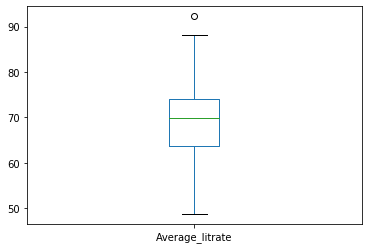

In [18]:
ecom.plot.box()

# Step 1: State the null hypothesis

NULL HYPOTHESIS: Ho- mu=69.92
The average literacy rate of all 30 states of india is 69.92



# Step 2: State the Alternate Hypothesis

Alternate HYPOTHESIS:H1-mu not =69.92
The average literacy rates of all 30 states of india is not equal to 69.92

# Step 3:Set value of significance level (alpha)

The significance level of a test is a measure of how unlikely you want the results of the sample to be before you reject the null hypothesis 𝐻0
we want to test the claims of the average literacy rate at a 5% level of significance. This means that we choose the critical region so that 
the probability of average literacy rate is notless than 0.05. It’s the lowest 5% of the probability distribution.
α = 5% and critical value from the table is +/-1.96

In [19]:
# Standard normal distribution
# Critical value or z-statistic
stats.norm.interval(0.95, loc=0, scale=1)[1]

1.959963984540054

# Step 4:Apply test statistics and find p value

here we will do z test as the size of sample is (n>=30) and a two tailed test as the population mean is equal to 69.92

In [20]:
from scipy import stats

In [21]:
mean_states = ecom.mean().iloc[0]
print(mean_states)

69.92222222222223


In [22]:
# if we chose 5th and 95th percentile, we are eliminating 5% data on left and 5% data on right. 
# Total we are eliminating 10% of the data. We need to eliminate 5% of the data 
# We need to use the range 0.025 to 0.975 to elimiate 2.5% data on left and 2.5% data on right

confidence_interval = ecom.quantile([0.05 - 0.025, 0.95 + 0.025])

In [23]:
confidence_interval

,Average_litrate
0.025,53.341667
0.975,89.350000


In [24]:
lower_interval = confidence_interval.iloc[0,0]
upper_interval = confidence_interval.iloc[1,0]

print(lower_interval, upper_interval)

53.34166666666667 89.35


In [25]:
ecom.mean().iloc[0]

69.92222222222223

In [26]:
if ecom.mean().iloc[0] >= lower_interval and ecom.mean().iloc[0] <= upper_interval:
    print('The true mean {} is between the confidence interval of {} and {}'.format(ecom.mean().iloc[0], confidence_interval.iloc[0,0], confidence_interval.iloc[1,0]))

The true mean 69.92222222222223 is between the confidence interval of 53.34166666666667 and 89.35


In [31]:
ecom.sort_values(by='Average_litrate', inplace=True)

In [32]:
ecom

,states,Average_litrate
10,Jammu and Kashmir,48.750000
4,Bihar,55.083333
26,Uttar Pradesh,58.916667
11,Jharkhand,59.333333
2,Arunachal Pradesh,59.416667
22,Rajasthan,59.666667
1,Andhra Pradesh,61.166667
14,Madhya Pradesh,63.583333
5,Chhatisgarh,64.416667
20,Odisha,67.000000


TypeError: can only concatenate str (not "float") to str

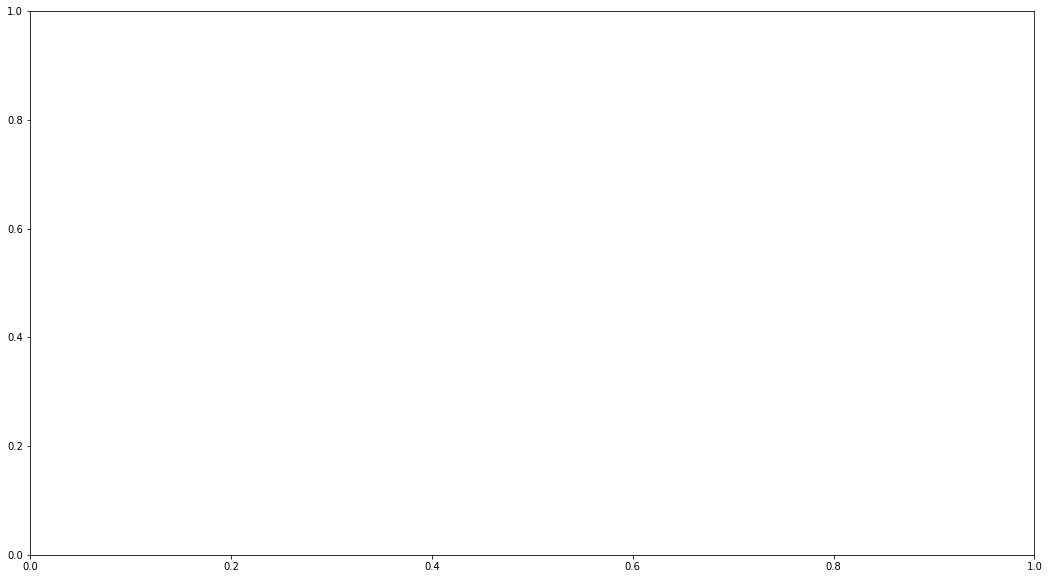

In [33]:
fig, ax = plt.subplots(figsize=(18,10)) # figsize in inches
sns.distplot(ecom, rug=True)
#sns.boxplot(data=df_means, orient="h", notch=True)

#wierd
x1 = [lower_interval, upper_interval]
x2 = [0.0, 0.0]    

ax.plot(x1, x2, 'red', linestyle='--', marker='o', lw=3)


y1 = [ecom.mean().iloc[0], ecom.mean().iloc[0]]
y2 = [0.0, 0.0]


ax.plot(y1, y2, 'green', linestyle='--', marker='o', lw=3)

# Step 5: Conclusion

Since the z test values are lying the range of +-1.96(95% confidence interval)
therefore we accept null hypothesis and reject alternate hypothsis
it means that The average literacy rate of all 30 states of india is 69.92